# TP Arbres de décisions

### importations des librairies:

In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

### Chargement des données : Récupération des données depuis le fichier 'diabetes.csv'.

In [47]:
df = pd.read_csv('diabetes.csv')

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Aperçu du Dataset

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Vérification des Valeurs Manquantes

In [51]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Gestion des Données Dupliquées

In [52]:
df.duplicated().sum()

0

## Exploration des Données 

In [53]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12408\3180805757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=df, palette='tab10')


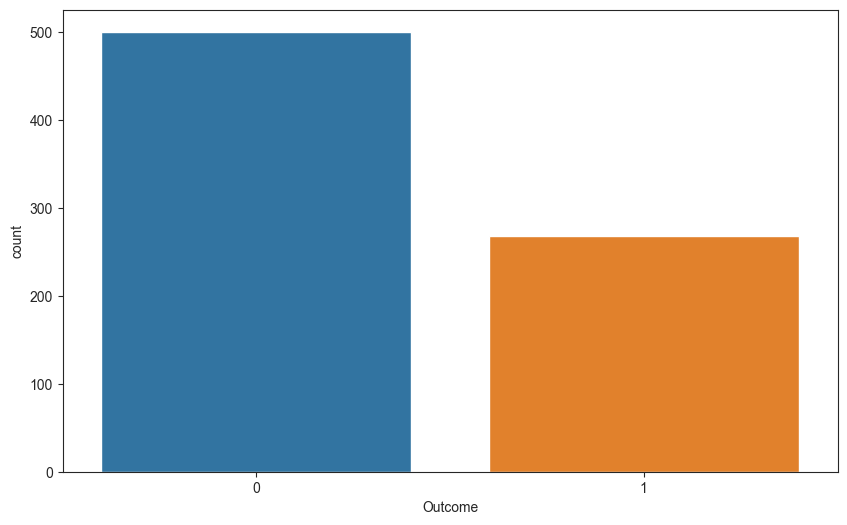

In [54]:
plt.figure(figsize=(10,6))
sns.set_style('ticks') 
sns.countplot(x='Outcome',data=df, palette='tab10')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12408\506070243.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=True)


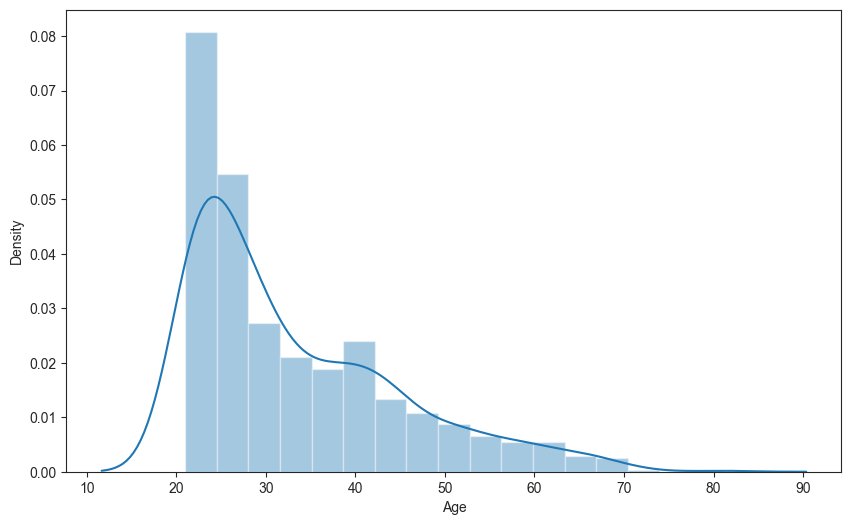

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'].dropna(),kde=True)
plt.show()

In [56]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


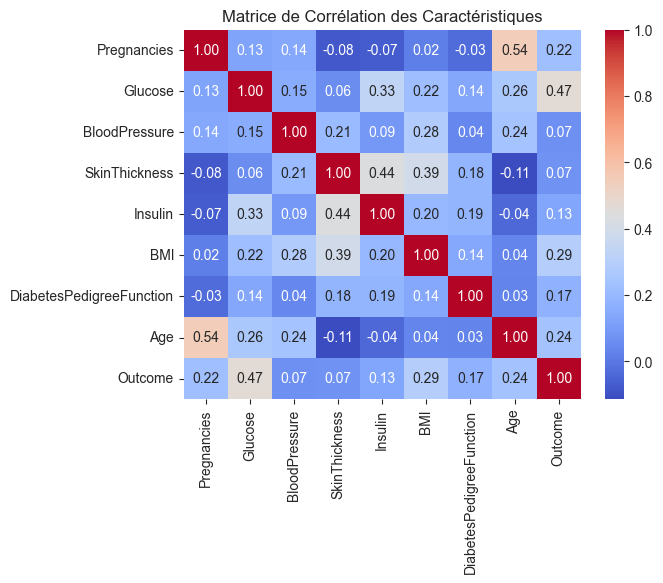

In [58]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()

## Modélisation avec l'arbre de décision 

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [60]:
# Create the classifier
mon_arbre_de_decision = DecisionTreeClassifier(random_state = 0)

In [61]:
# Train the classifier on the training set
cf=mon_arbre_de_decision.fit(x_train, y_train)

In [63]:
#prediction
y_pred=mon_arbre_de_decision.predict(x_test)

## Évaluation du Modèle

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7229437229437229


In [65]:
print ('Classification report :')
print('\n')
print(classification_report(y_test,y_pred))

Classification report :


              precision    recall  f1-score   support

           0       0.80      0.77      0.78       150
           1       0.60      0.64      0.62        81

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.72      0.73       231



In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[115  35]
 [ 29  52]]


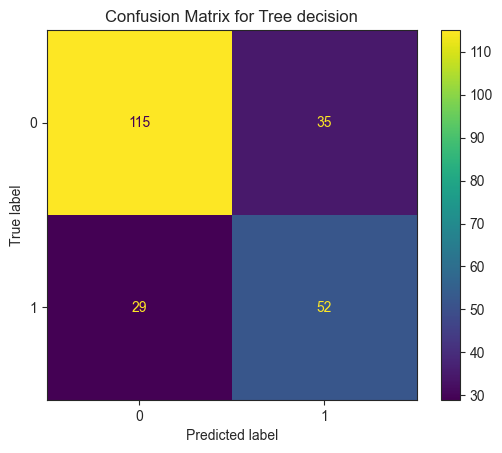

In [67]:
sns.set_style('ticks')
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix for Tree decision")
plt.show()

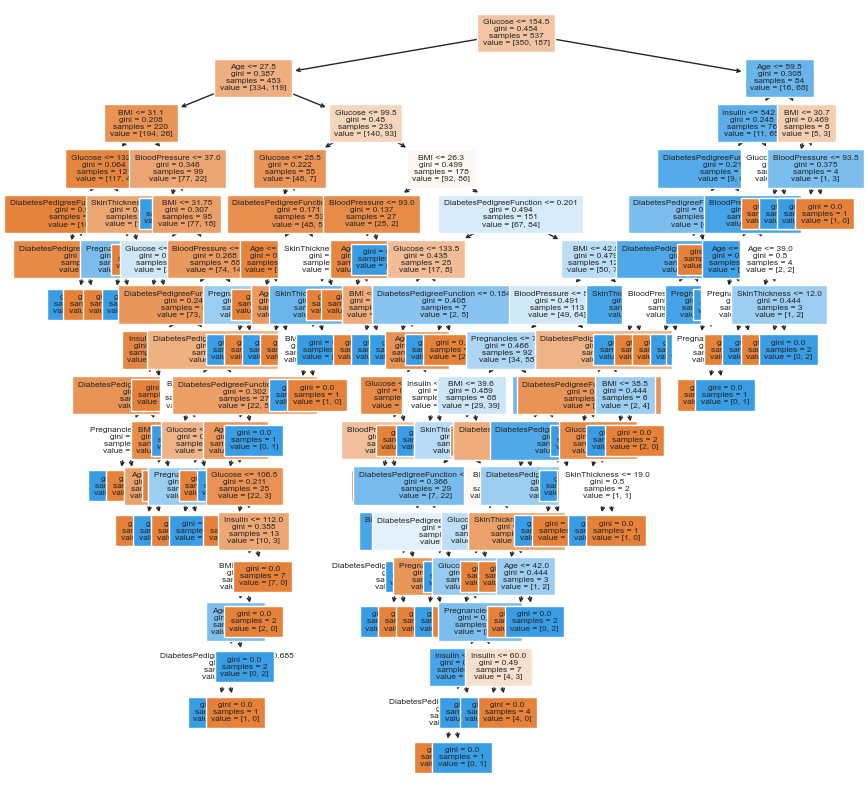

In [68]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']
plt.figure(figsize=(10,10))
fig = plot_tree(cf, filled=True, fontsize=6, feature_names=x.columns)

## Modélisation avec la regression logistique 

In [69]:
log = LogisticRegression()

In [70]:
log.fit(x_train,y_train)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
predictions = log.predict(x_test)

## Évaluation du Modèle

In [72]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7965367965367965


In [73]:
print ('Classification report :')
print('\n')
print(classification_report(y_test,predictions))

Classification report :


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       150
           1       0.75      0.63      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [81]:
cm = confusion_matrix(y_test, predictions)
print ('Matrice de confusion :')
print('\n')
print(cm)

Matrice de confusion :


[[133  17]
 [ 30  51]]


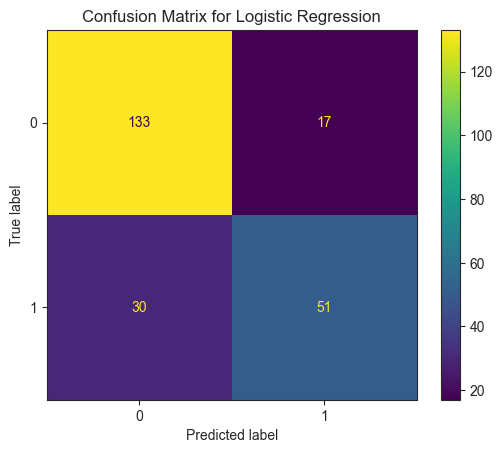

In [75]:
sns.set_style('ticks')
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()